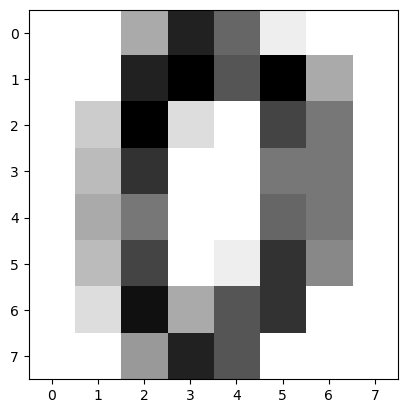

In [70]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')

In [71]:
X = digits.images
y = digits.target

In [72]:
X

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [73]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [74]:
X.shape

(1797, 8, 8)

In [75]:
y.shape

(1797,)

In [76]:
from keras.utils import np_utils
import tensorflow.keras as keras
from keras import Sequential
import numpy as np

nb_classes = 10
y = np_utils.to_categorical(y, nb_classes)
X = X.reshape(X.shape[0],8,8,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
#X_train = X_train / 16.0
#X_test = X_test / 16.0

In [78]:
#X_train = X_train.reshape(X_train.shape[0], 8, 8, 1)
#X_test = X_test.reshape(X_test.shape[0], 8, 8, 1)

In [79]:
#y_train = keras.utils.to_categorical(y_train)
#y_test = keras.utils.to_categorical(y_test)

In [80]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras import models
from keras import layers

#model = Model(inputs=inputs, outputs=output)
def build_model(): 
    model = models.Sequential()
    model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(8, 8, 1)))
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


model = build_model() 

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 6, 6, 64)          640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 10)                1290      
                                                      

In [81]:
X_train.shape

(1437, 8, 8, 1)

In [82]:
y_train.shape

(1437, 10)

In [83]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
45/45 [==============================] - 1s 5ms/step - loss: 1.2523 - accuracy: 0.6228 - val_loss: 0.4026 - val_accuracy: 0.8944
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.2610 - accuracy: 0.9276 - val_loss: 0.1819 - val_accuracy: 0.9417
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.1324 - accuracy: 0.9603 - val_loss: 0.1115 - val_accuracy: 0.9694
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9847 - val_loss: 0.1091 - val_accuracy: 0.9694
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9833 - val_loss: 0.0795 - val_accuracy: 0.9722
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9896 - val_loss: 0.0558 - val_accuracy: 0.9750
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9951 - val_loss: 0.0535 - val_accuracy: 0.9778
Epoch 8/100
4

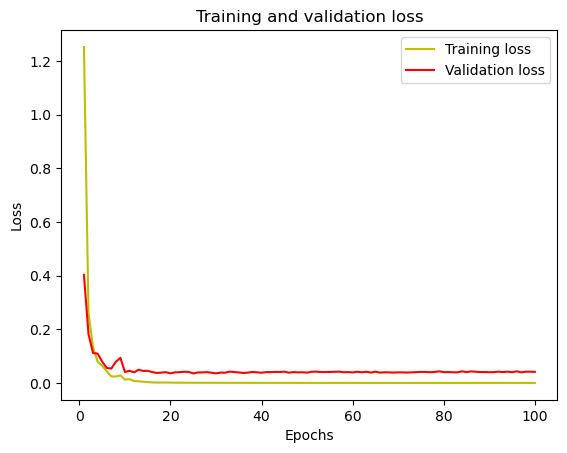

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        34
           8       1.00      0.93      0.97        30
           9       1.00      1.00      1.00        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0